In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('house_prices.csv')
df.head()

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
1,2,1Fam,9600,NaN,1976,2007,181500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000


<font color='red'>Assignment:</font> Create a new DataFrame "df_new" which contains only single family residences (hint: df.BldgType == '1Fam')

In [4]:
df_new = df[df.BldgType == '1Fam']

In [5]:
df_new

,Id,BldgType,LotArea,GrLivArea,YearBuilt,YrSold,SalePrice
0,1,1Fam,8450,1710.0,2003,2008,208500
1,2,1Fam,9600,NaN,1976,2007,181500
2,3,1Fam,11250,1786.0,2001,2008,223500
3,4,1Fam,9550,1717.0,1915,2006,140000
4,5,1Fam,14260,2198.0,2000,2008,250000
...,...,...,...,...,...,...,...
1455,1439,1Fam,7407,1236.0,1957,2010,149700
1456,1447,1Fam,26142,1188.0,1962,2010,157900
1457,1457,1Fam,13175,2073.0,1978,2010,210000
1458,1458,1Fam,9042,2340.0,1941,2010,266500


<font color='red'>Assignment:</font> How many rows are there in df_new and how many rows are there in df? How many rows did you remove?

In [6]:
len(df)

1460

In [7]:
len(df_new)

1220

In [8]:
len(df) - len(df_new)

240

In [10]:
df_new.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010])

In [14]:
df_new.YrSold.value_counts(sort=False)

2006    258
2007    280
2008    253
2009    286
2010    143
Name: YrSold, dtype: int64

In [31]:
sorted(list(df_new.YrSold.unique()))

[2006, 2007, 2008, 2009, 2010]

In [32]:
train_raw = df_new[df_new.YrSold < 2010].reset_index(drop=True)
test_raw = df_new[df_new.YrSold >= 2010].reset_index(drop=True)
print(len(test_raw), len(train_raw))

143 1077


<font color='red'>Assignment:</font> check if there are any missing values in train_raw and test_raw.

In [35]:
train_raw.isna().any()

Id           False
BldgType     False
LotArea      False
GrLivArea     True
YearBuilt    False
YrSold       False
SalePrice    False
dtype: bool

In [36]:
test_raw.isna().any()

Id           False
BldgType     False
LotArea      False
GrLivArea    False
YearBuilt    False
YrSold       False
SalePrice    False
dtype: bool

In [40]:
train_raw[['Id', 'BldgType', 'LotArea', 'GrLivArea', 'YearBuilt', 'YrSold', 'SalePrice']].isnull().any().any()

True

In [41]:
test_raw[['Id', 'BldgType', 'LotArea', 'GrLivArea', 'YearBuilt', 'YrSold', 'SalePrice']].isnull().any().any()

False

# Data Pre-processing

<font color='red'>Assignment:</font> Build a DataFrame named **train** which contains numerical values of **SalePrice** and **GrLivArea** in **train_raw**.

In [42]:
train = train_raw[['SalePrice', 'GrLivArea']]

In [43]:
train

,SalePrice,GrLivArea
0,208500,1710.0
1,181500,NaN
2,223500,1786.0
3,140000,1717.0
4,250000,2198.0
...,...,...
1072,287090,1578.0
1073,84500,NaN
1074,185000,1221.0
1075,175000,1647.0


**Example:** Generate features and target.

In [46]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X_train = train[features].copy()
y_train = train[target].copy()

In [55]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1072    287090
1073     84500
1074    185000
1075    175000
1076    147500
Name: SalePrice, Length: 1077, dtype: int64

**Example:** Imputing missing values in **X_train** using the column mean.

In [57]:
X_train = X_train.fillna(X_train.mean())


In [58]:
X_train.head()

,GrLivArea
0,1710.000000
1,1539.019473
2,1786.000000
3,1717.000000
4,2198.000000


<font color='red'>Assignment:</font> Get **X_test** and **y_test**.  

In [63]:
test = test_raw[['SalePrice', 'GrLivArea']]

In [64]:
test.head()

,SalePrice,GrLivArea
0,149000,1004.0
1,154000,1060.0
2,134800,900.0
3,306000,1704.0
4,165500,1700.0


In [65]:
X_test = test[features].copy()
y_test = test[target].copy()

In [66]:
X_test.head()

,GrLivArea
0,1004.0
1,1060.0
2,900.0
3,1704.0
4,1700.0


<font color='red'>Question:</font> Why do we use mean from **X_train** rather than mean from **X_test**?

Values from X_test can never be used in X_train because it is used to train the data

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

**Example:** Initialize model

In [68]:
model = LinearRegression()

**Example:** Fit model

In [69]:
model.fit(X_train, y_train)

LinearRegression()

**Example:** Get prediction

In [70]:
y_train_pred = model.predict(X_train)

In [72]:
X_train

,GrLivArea
0,1710.000000
1,1539.019473
2,1786.000000
3,1717.000000
4,2198.000000
...,...
1072,1578.000000
1073,1539.019473
1074,1221.000000
1075,1647.000000


<font color='red'>Assignment:</font> Calculate **train loss**: **MAE**, **MSE**, and **R2 score**.

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [76]:
mean_absolute_error(y_train_pred, y_train)

41856.51240871164

In [77]:
mean_squared_error(y_train_pred, y_train)

3997917652.340051

In [81]:
r2_score(y_train_pred, y_train)

-0.4193350749584541

<font color='red'>Assignment:</font> Visualize the difference between prediction and ground truth. Do you see any problem or anything unusual? Why? Hint: use plt.scatter()

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
y_train_pred.dtype

dtype('float64')

In [113]:
data = { 'pred': y_train_pred, 'train': y_train}
error = pd.DataFrame(data)

<AxesSubplot:xlabel='pred', ylabel='train'>

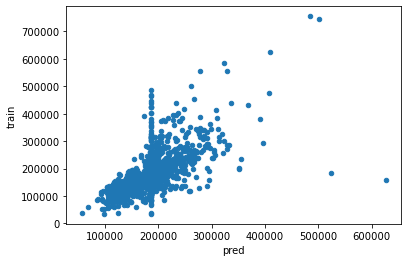

In [123]:
error.plot(x='pred', y='train', kind='scatter')

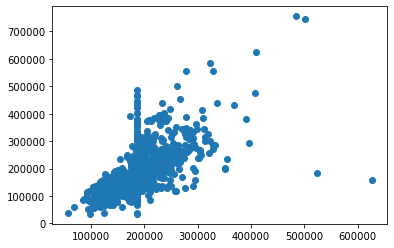

In [127]:
plt.scatter(y_train_pred, y_train)

<font color='red'>Question:</font> What are the coefficient and intercept for this model?

In [128]:
model.coef_

array([107.52757503])

In [129]:
model.intercept_

20386.36831696803

**Example:** Visualize the relationship between **sale price** and **living area**.

In [130]:
import numpy as np

def myPlot(area, price, model):
    plt.scatter(area, price, alpha=0.3)
    x = np.linspace(0, area.max())
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color='r')
    plt.xlabel('Living area')
    plt.ylabel('Sale price')
    plt.show()

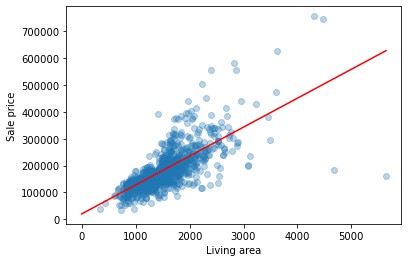

In [112]:
myPlot(train.GrLivArea, train.SalePrice, model)

<font color='red'>Assignment:</font> Calculate the **test loss**; visualize the comparision between prediction and ground truth, and the relationship between living area and sale price.

In [6]:
#hint: use model to predict price with test data first


# Polynomial Features

In [63]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
pf = PolynomialFeatures(degree=3)

In [65]:
pf.fit_transform(X_train)

array([[1.00000000e+00, 1.71000000e+03, 2.92410000e+06, 5.00021100e+09],
       [1.00000000e+00, 1.53901947e+03, 2.36858094e+06, 3.64529219e+09],
       [1.00000000e+00, 1.78600000e+03, 3.18979600e+06, 5.69697566e+09],
       ...,
       [1.00000000e+00, 1.22100000e+03, 1.49084100e+06, 1.82031686e+09],
       [1.00000000e+00, 1.64700000e+03, 2.71260900e+06, 4.46766702e+09],
       [1.00000000e+00, 1.25600000e+03, 1.57753600e+06, 1.98138522e+09]])

In [66]:
pf.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3']

In [67]:
pd.DataFrame(pf.transform(X_train), 
             columns=pf.get_feature_names()).head()

,1,x0,x0^2,x0^3
0,1.0,1710.000000,2.924100e+06,5.000211e+09
1,1.0,1539.019473,2.368581e+06,3.645292e+09
2,1.0,1786.000000,3.189796e+06,5.696976e+09
3,1.0,1717.000000,2.948089e+06,5.061869e+09
4,1.0,2198.000000,4.831204e+06,1.061899e+10


<font color='red'>Question:</font> What is each column in above dataframe?

## Pipeline

**Example:** use of **pipeline**.

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('lr', LinearRegression())]
model = Pipeline(steps)

**Example:** use pipeline as model.

In [70]:
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [71]:
y_train_pred = model.predict(X_train)

<font color='red'>Assignment:</font> Calculate regression metrics; visualize both **train** and **cost** loss; visualize relationship between **living area** and **sale price**.

<font color='red'>Question:</font> Does the model with polynomial features perform better? Why?

**Example:** Extract the linear model from pipeline

In [76]:
lr = model.steps[1][1]

**Example:** Extract the coefficents

In [77]:
lr.coef_

array([ 0.00000000e+00,  1.63784703e+02, -1.43272371e-02])

<font color='red'>Question:</font> Why is the coefficient for x^2 so small?

## Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('Rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model = Pipeline(steps)

In [80]:
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('Rescale', MinMaxScaler()),
                ('lr', LinearRegression())])

In [81]:
model.steps[2][1].coef_

array([      0.        ,  869369.20419295, -454468.67062754])

<font color='red'>Question:</font> What does **MinMaxScaler** do? Why do we need it?

## High degree polynomial terms

<font color='red'>Assignment:</font> Repeat above steps with higher **degree** values in **PolynomialFeatures**. Hint: you can write a for loop to loop through degree 1 to 50, and record the MAE of train and test in mae_train and mae_test.

In [84]:
mae_train={}
mae_test={}
for i in range(1,50):
    steps = [('poly', PolynomialFeatures(degree=i)),('Rescale', MinMaxScaler()),('lr', LinearRegression())]
    # add your code here



<font color='red'>Assignment:</font> Visualize the change of train loss and test loss with polynomial degree value, respectively. Use **MAE**.

<font color='red'>Assignment:</font> Is there anything wrong with the approach in this notebook? Please try removing the rows with missing value in train instead of imputing it with mean, and see how the results change. You can create a new notebook to do it.